In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = sns.load_dataset("titanic")

print("original dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

original dataset shape: (891, 15)

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [7]:
print("\n missing values:")
print(df.isnull().sum())


 missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [8]:
df["age"].fillna(df["age"].median(), inplace=True)

/tmp/ipykernel_19546/3040546416.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df["age"].fillna(df["age"].median(), inplace=True)


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [9]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/tmp/ipykernel_19546/1964997694.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: str

In [10]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)

Upper bound: 65.6344
Lower bound: -26.724


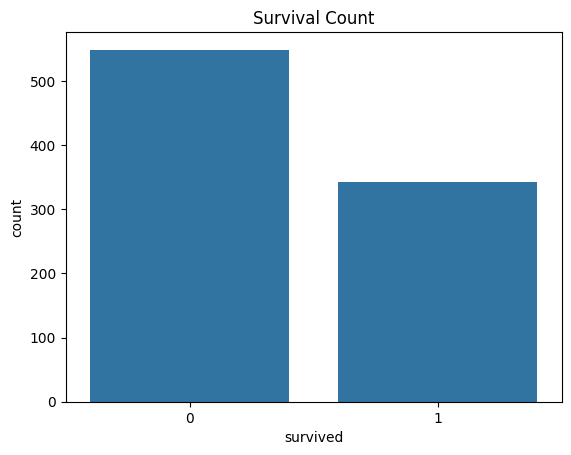

In [11]:
plt.figure()
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()